In [94]:
import numpy as np

# Gestione immagini
from skimage import io # Per input/output
from skimage import transform # Per trasformazioni geometriche (es. resize)
from skimage import filters # Per filtri locali
from skimage import color # Per cambi colore

# Visualizzazione e interazione
from matplotlib import pyplot as plt
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [15,5] # width, height

In [357]:
image = io.imread('images/moon.jpg', as_gray=True)
image.shape

(331, 320)

In [358]:
np.max(image)

255

In [359]:
image = image/np.max(image)

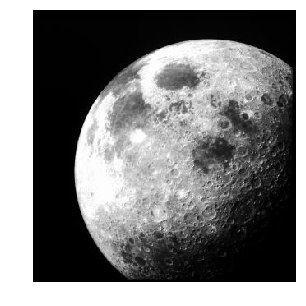

In [361]:
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [362]:
def gaussian_mask(image, sigma=1):
    filtered = filters.gaussian(image, sigma)
    mask = image - filtered
    return mask

def shapened_image(image, sigma=1, high_boost=1):
    mask = gaussian_mask(image, sigma)
    return image + mask*high_boost

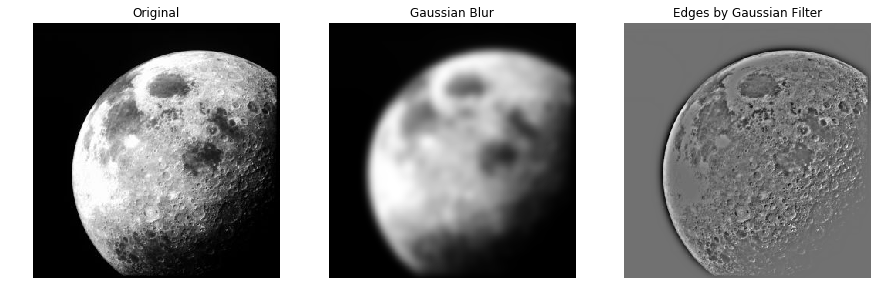

In [368]:
SIGMA = 5

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 
plt.subplot(132)
plt.imshow(filters.gaussian(image, SIGMA), cmap='gray'); plt.title('Gaussian Blur')
plt.axis('off') 
plt.subplot(133)
plt.imshow(gaussian_mask(image, SIGMA), cmap='gray')
plt.title('Edges by Gaussian Filter')
plt.axis('off')
plt.show()

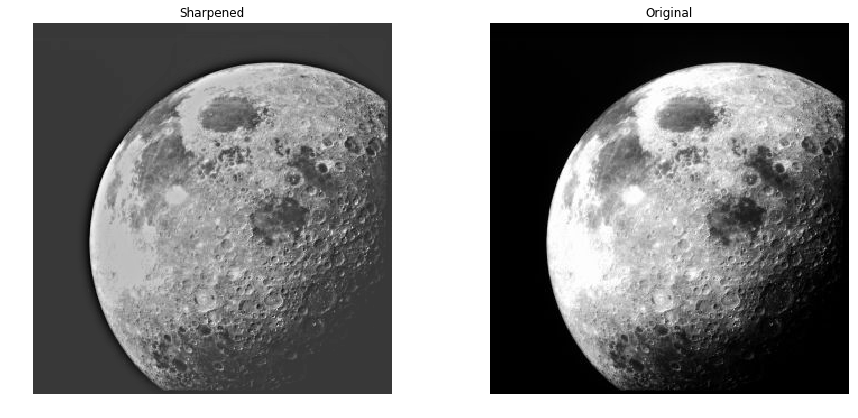

In [369]:
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(shapened_image(image, SIGMA), cmap='gray'); plt.title('Sharpened')
plt.axis('off') 
plt.subplot(222)
plt.imshow(image, cmap='gray'); plt.title('Original')
plt.axis('off') 
plt.show()